### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 된다
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(녹색을 제외한 모든 색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/titanic_cleaning.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


### train, test셋 구분 및 스케일

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare']
label = 'Survived'

X,y =df[features], df[label]

### MinMaxScaler

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform(X)

#### train, test셋 분리 - 80:20

In [6]:
#X.head()
#X_scaler
X_train_minMax, X_test_minMax , y_train, y_test = \
                train_test_split(X_scaler, y ,test_size=0.2)

In [7]:
knn = KNeighborsClassifier( n_neighbors=7)
knn.fit(X_train_minMax, y_train)
print('train : ', knn.score(X_train_minMax, y_train))
print('test : ', knn.score(X_test_minMax, y_test))

train :  0.8426966292134831
test :  0.8379888268156425


In [8]:
k_param = range(1,11)
train_list = []
test_list = []
for k in k_param:
    #print(k)
    knn = KNeighborsClassifier( n_neighbors=k )
    knn.fit(X_train_minMax, y_train)
    train_list.append( knn.score(X_train_minMax, y_train))
    test_list.append( knn.score(X_test_minMax, y_test))
    
dic = {
    'k' :  k_param,
    'train정확도':train_list,
    'test정확도':test_list
}
score_df = pd.DataFrame(dic)
score_df

,k,train정확도,test정확도
0,1,0.987360,0.765363
1,2,0.882022,0.826816
2,3,0.876404,0.826816
3,4,0.856742,0.849162
4,5,0.852528,0.821229
5,6,0.844101,0.849162
6,7,0.842697,0.837989
7,8,0.830056,0.849162
8,9,0.830056,0.832402
9,10,0.814607,0.837989


<AxesSubplot:xlabel='k', ylabel='train정확도'>

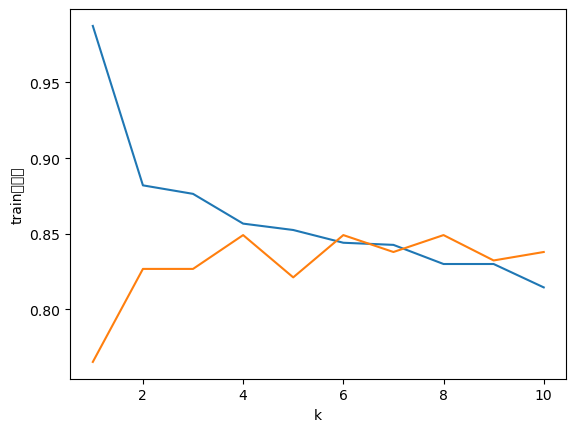

In [9]:
import seaborn as sns
sns.lineplot(x='k',y='train정확도', data=score_df)
sns.lineplot(x='k',y='test정확도', data=score_df)

### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행한다
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련한다
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': k_param
}
knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5,n_jobs = -1)
grid_cv.fit(X_train_minMax, y_train)
print('train : ', grid_cv.score(X_train_minMax, y_train))
print('test : ', grid_cv.score(X_test_minMax, y_test))

'최적의 하이퍼 파라미터 : ', grid_cv.best_params_

train :  0.8567415730337079
test :  0.8491620111731844


('최적의 하이퍼 파라미터 : ', {'n_neighbors': 4})

In [11]:
params = {
    'n_neighbors':range(1,11),
    'metric':['manhattan', 'euclidean'],
    'weights':['uniform', 'distance'],
    
}

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs= -1)
grid_cv.fit(X_train_minMax, y_train)
print('train : ', grid_cv.score(X_train_minMax, y_train))
print('test : ', grid_cv.score(X_test_minMax, y_test))

'최적의 하이퍼 파라미터 : ', grid_cv.best_params_

train :  0.8567415730337079
test :  0.8491620111731844


('최적의 하이퍼 파라미터 : ',
 {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'})

In [14]:
pred = grid_cv.predict(X_test_minMax)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='uniform')
knn.fit(X_train_minMax,y_train)
print('test : ',knn.score(X_test_minMax,y_test))

0.8491620111731844
test :  0.8435754189944135
